In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.patches as patches
import datetime

#import statsmodels.api as sm

### Loading Data

In [2]:
games_data = pd.read_csv('games.csv',low_memory = False)
players_data = pd.read_csv('players.csv',low_memory = False)
plays_data = pd.read_csv('plays.csv', low_memory = False)
plays_data

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,NaN,NaN,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,NaN,NaN,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,NaN,NaN,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,NaN,NaN,NaN,DPI,BAL 23,I,0,15,1.336078,True


## Data Transformation

### Games File
1. gameId: Game identifier, unique (numeric)
2. gameDate: Game Date (time, mm/dd/yyyy)
3. gameTimeEastern: Start time of game (time, HH:MM:SS, EST)
4. homeTeamAbbr: Home team three-letter code (text)
5. visitorTeamAbbr: Visiting team three-letter code (text)
6. week: Week of game (numeric)

In [3]:
dates = games_data['gameDate']

## Changing the format of date to standard format in all files
stand_date = pd.to_datetime(dates)
games_data['gameDate'] = stand_date


## Adding column named 'days'
days = games_data['gameDate'].apply(lambda x: x.strftime('%a'))
games_data['days'] = days

games_data

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,days
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1,Thu
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1,Sun
2,2018090902,2018-09-09,13:00:00,IND,CIN,1,Sun
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1,Sun
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1,Sun
...,...,...,...,...,...,...,...
248,2018123013,2018-12-30,16:25:00,DEN,LAC,17,Sun
249,2018123015,2018-12-30,16:25:00,SEA,ARI,17,Sun
250,2018123014,2018-12-30,16:25:00,LA,SF,17,Sun
251,2018122200,2018-12-22,16:30:00,TEN,WAS,16,Sat


### Players File
1. nflId: Player identification number, unique across players (numeric)
2. height: Player height (text)
3. weight: Player weight (numeric)
4. birthDate: Date of birth (YYYY-MM-DD)
5. collegeName: Player college (text)
6. position: Player position (text)
7. displayName: Player name (text)


In [4]:
## Changing the format of date to standard format in all files
stand_date = pd.to_datetime(players_data['birthDate'])
players_data['birthDate'] = stand_date

## Converting height into inches
players_data['height'] = [int(i[0])*12 + int(i[2]) if '-' in i else i for i in players_data['height'] ]
players_data['height'] = pd.to_numeric(players_data['height'])

## Adding two column name 'year' and 'age'
players_data['year'] = pd.to_datetime(players_data['birthDate']).dt.year
players_data['age'] = 2018 - players_data['year']

players_data

,nflId,height,weight,birthDate,collegeName,position,displayName,year,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25
...,...,...,...,...,...,...,...,...,...
1298,2553798,74,235,1991-09-17,Vanderbilt,LS,Andrew East,1991,27
1299,2556814,74,200,1994-05-17,Duke,WR,Max McCaffrey,1994,24
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,1992,26
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,1993,25


#### Plays File

1. gameId: Game identifier, unique (numeric)
2. playId: Play identifier, not unique across games (numeric)
4. playDescription: Description of play (text)
5. quarter: 1. Game quarter (numeric)
6. down: 2. Down (numeric)
7. yardsToGo: 3. Distance needed for a first down (numeric)
8. possessionTeam: 4. Team on offense (text)
9. playType: 5. Outcome of dropback: sack or pass (text)
10. yardlineSide: 3-letter team code corresponding to line-of-scrimmage (text)
11. yardlineNumber: 6. Yard line at line-of-scrimmage (numeric)
12. offenseFormation: 7. Formation used by possession team (text)
13. personnelO: 8. Personnel used by offensive team (text)
14. defendersInTheBox: 9. Number of defenders in close proximity to line-of-scrimmage (numeric)
15. numberOfPassRushers: 10. Number of pass rushers (numeric)
16. personnelD: 11. Personnel used by defensive team (text)
17. typeDropback: 12. Dropback categorization of quarterback (text)
18. preSnapHomeScore: Home score prior to the play (numeric)
19. preSnapVisitorScore: Visiting team score prior to the play (numeric)
20. gameClock: Time on clock of play (MM:SS)
21. absoluteYardlineNumber: 13. Distance from end zone for possession team (numeric)
22. penaltyCodes: NFL categorization of the penalties that ocurred on the play. For purposes of this contest, the most important penalties are Defensive Pass Interference (DPI), Offensive Pass Interference (OPI), Illegal Contact (ICT), and Defensive Holding (DH). Multiple penalties on a play are separated by a ; (text)
23. penaltyJerseyNumber: Jersey number and team code of the player commiting each penalty. Multiple penalties on a play are separated by a ; (text) 
24. passResult: 14. Outcome of the passing play (C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass, text)
25. offensePlayResult: 15. Yards gained by the offense, excluding penalty yardage (numeric)
26. playResult: 16. Net yards gained by the offense, including penalty yardage (numeric)
27. epa: Expected points added on the play, relative to the offensive team. Expected points is a metric that estimates the average of every next scoring outcome given the play's down, distance, yardline, and time remaining (numeric)
28. isDefensivePI: An indicator variable for whether or not a DPI penalty ocurred on a given play (TRUE/FALSE)


In [5]:
## Removing Irrelevant rows
plays_df = plays_data.drop(columns=['playDescription', 'possessionTeam', 'playType', 'yardlineSide', 'personnelO', 'personnelD', 'typeDropback', 'gameClock', 'penaltyCodes', 'isDefensivePI', 'offenseFormation', 'penaltyJerseyNumbers', 'offensePlayResult', 'epa', 'passResult'])

## Removing Rows with empty values
plays_df = plays_df.dropna()
plays_df = plays_df.astype(float)
plays_df['passResult'] = plays_data['passResult']
plays_df

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,playResult,passResult
0,2.018091e+09,75.0,1.0,1.0,15.0,20.0,7.0,4.0,0.0,0.0,90.0,10.0,C
1,2.018091e+09,146.0,1.0,1.0,10.0,39.0,7.0,4.0,0.0,0.0,49.0,0.0,I
2,2.018091e+09,168.0,1.0,2.0,10.0,39.0,6.0,4.0,0.0,0.0,49.0,0.0,I
3,2.018091e+09,190.0,1.0,3.0,10.0,39.0,6.0,5.0,0.0,0.0,49.0,33.0,C
4,2.018091e+09,256.0,1.0,3.0,1.0,1.0,8.0,6.0,0.0,0.0,11.0,0.0,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18601,2.018122e+09,3842.0,4.0,2.0,2.0,33.0,6.0,4.0,22.0,10.0,77.0,7.0,C
18602,2.018122e+09,3884.0,4.0,1.0,10.0,40.0,4.0,5.0,22.0,10.0,70.0,17.0,C
18603,2.018122e+09,3909.0,4.0,1.0,10.0,43.0,5.0,5.0,22.0,10.0,53.0,0.0,I
18604,2.018122e+09,3931.0,4.0,2.0,10.0,43.0,4.0,4.0,22.0,10.0,53.0,0.0,I


In [6]:
##Function for plotting the frequency of the column
def find_freq(file, column):
    freq_table = file[column].value_counts().reset_index()              ##CHECKING THE FREQUENCY
    
    freq_table.columns = [column, 'frequency']                          ##RENAMING AND SORTING
    sorted_freq_table = freq_table.sort_values(column, ascending=True).set_index(column)

    sorted_freq_table.plot(kind='bar', figsize=(25,15))                 ##BAR PLOT
    plt.ylabel('Count', size = 20)
    plt.xlabel(column, size = 20)

### Data Visualization

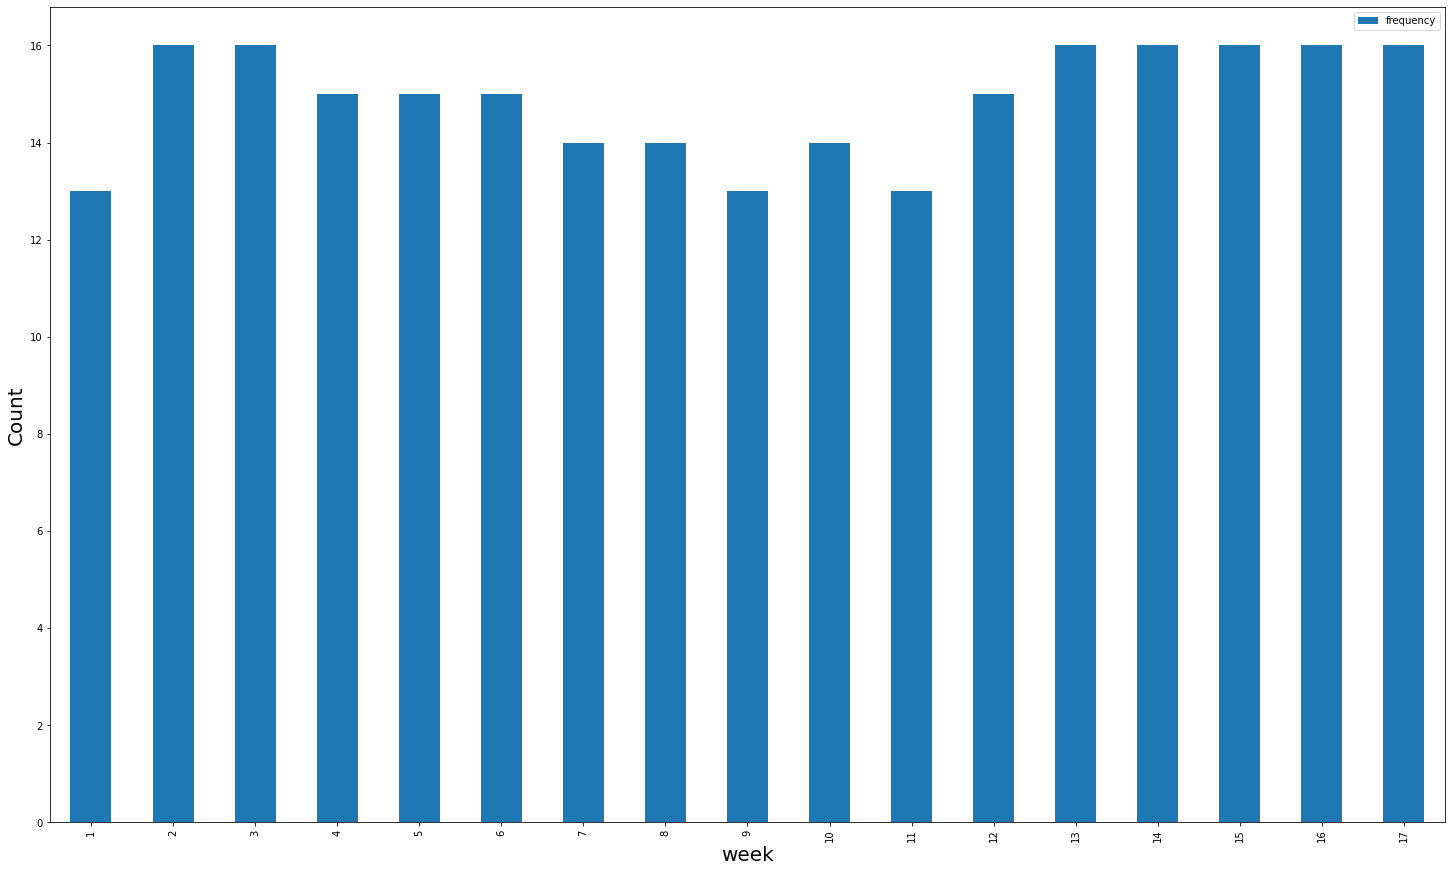

In [7]:
find_freq(games_data, 'week')

In [8]:
#find_freq(games_data, 'gameDate')

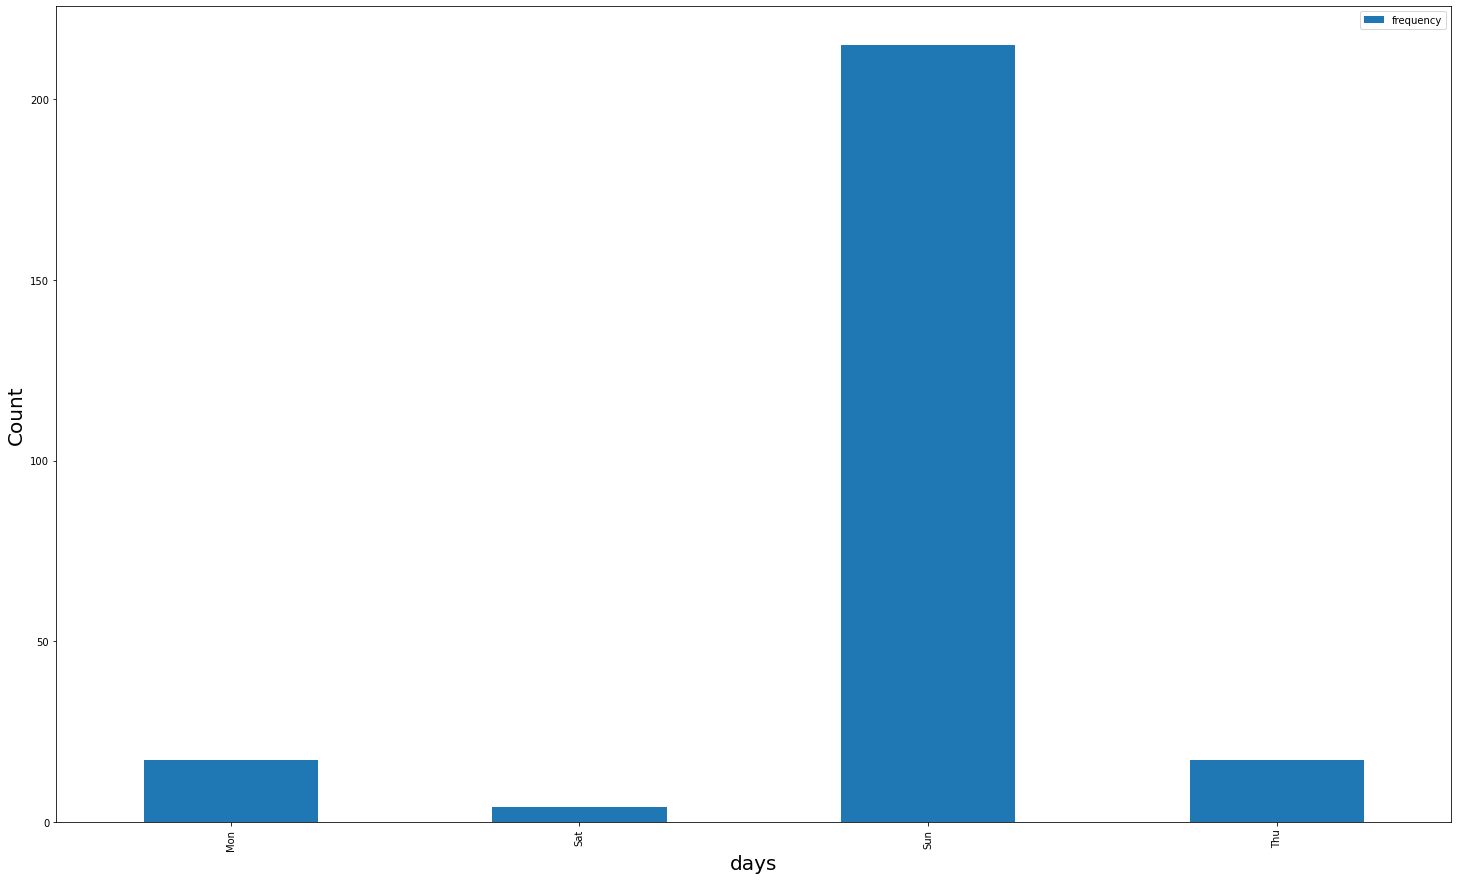

In [9]:
find_freq(games_data, 'days')

In [10]:
#find_freq(players_data, 'height')

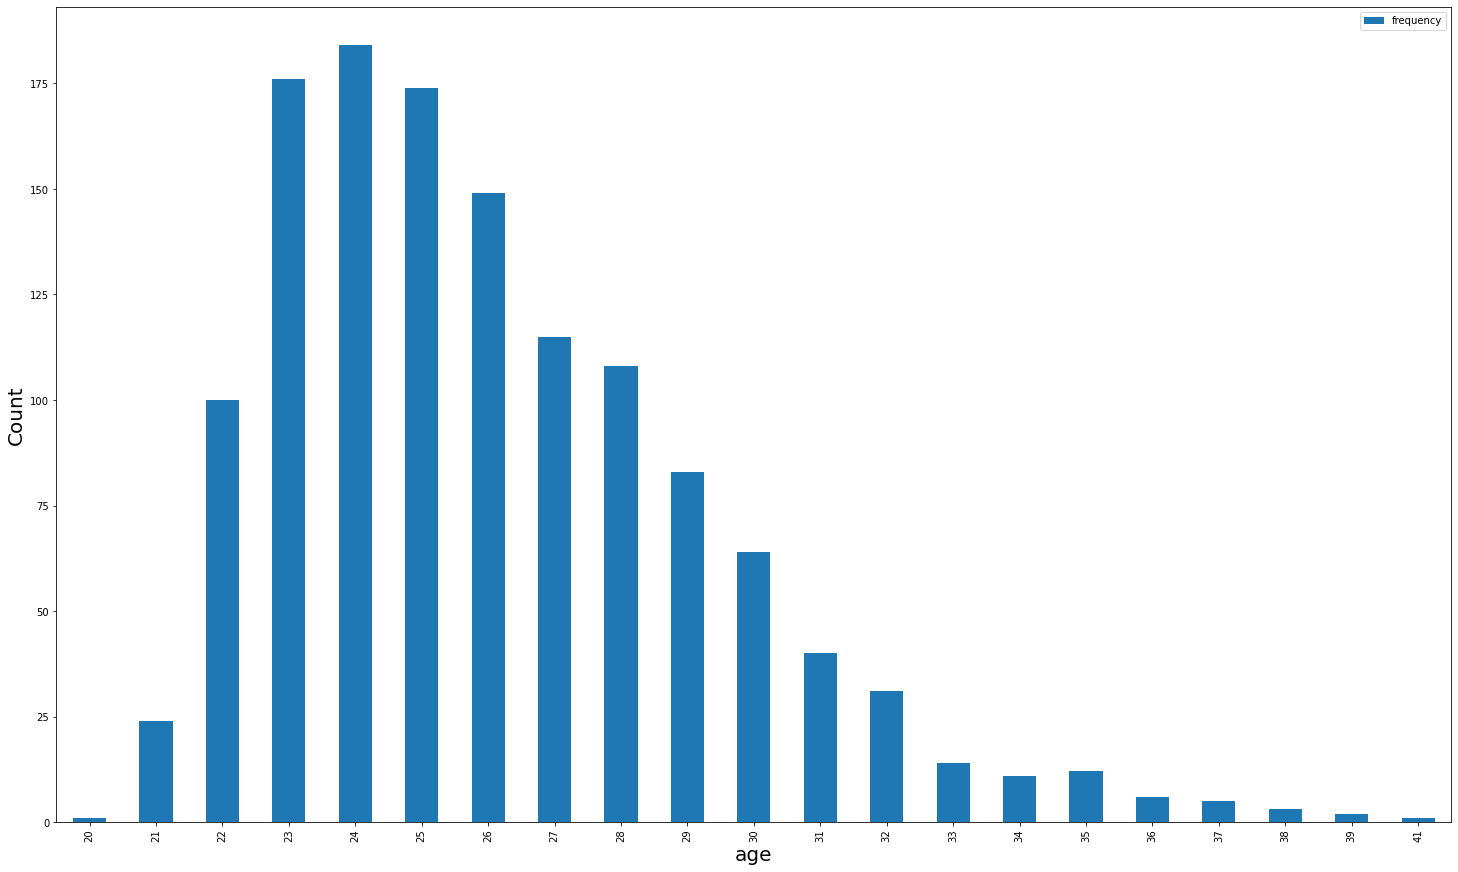

In [11]:
find_freq(players_data, 'age')

Text(0, 0.5, 'Count')

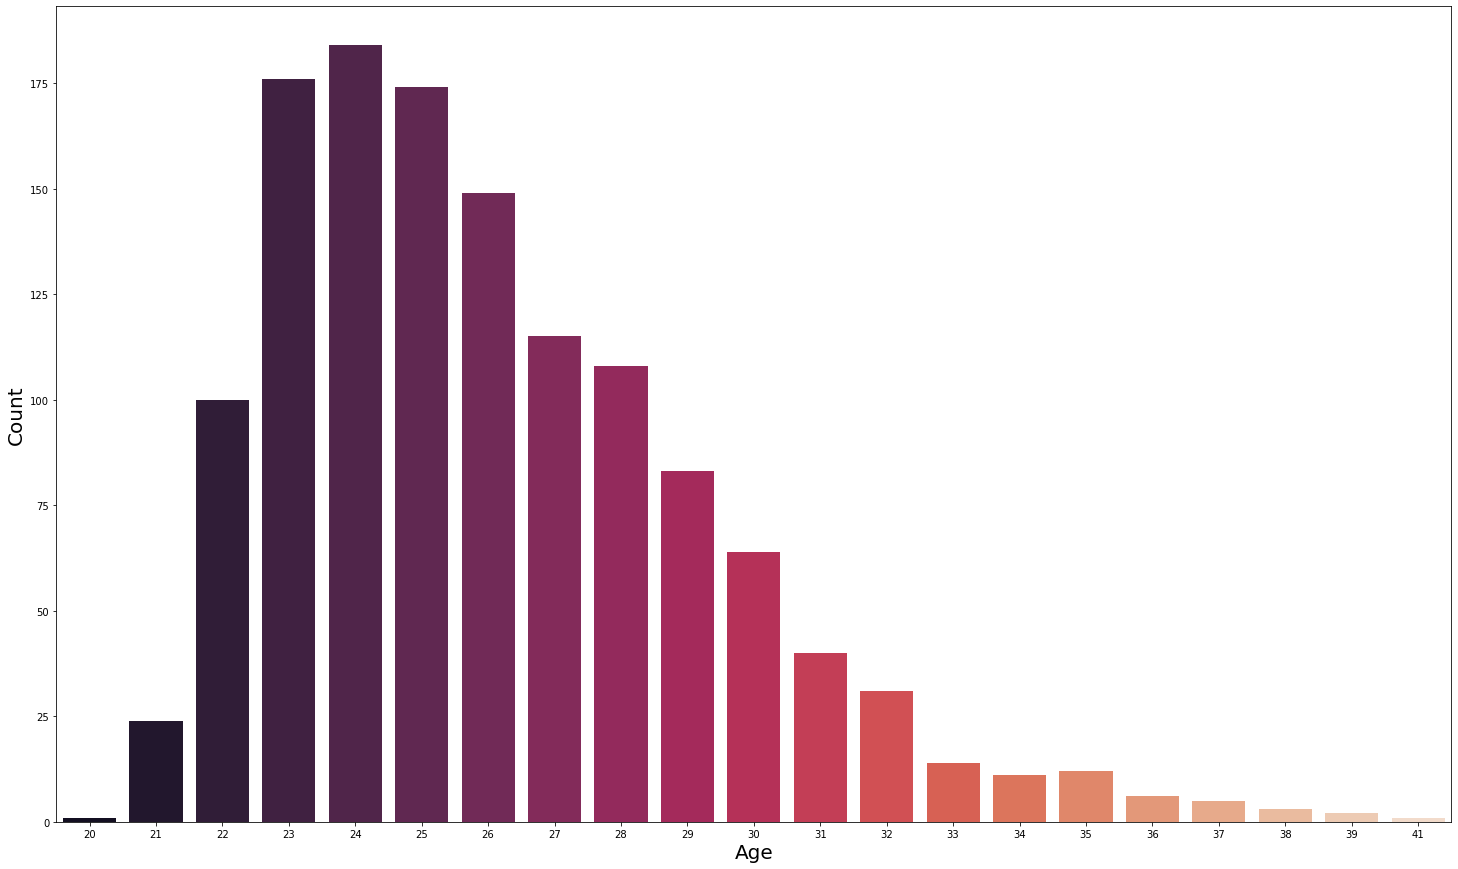

In [12]:
# Visualizing frequency distribution of players in relation to their age with Seaborn

plt.figure(figsize=(25,15))
graph = sns.countplot(x='age', data=players_data, palette='rocket')
plt.xlabel('Age',size=20)
plt.ylabel('Count',size=20)


In [13]:
plays_df

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,playResult,passResult
0,2.018091e+09,75.0,1.0,1.0,15.0,20.0,7.0,4.0,0.0,0.0,90.0,10.0,C
1,2.018091e+09,146.0,1.0,1.0,10.0,39.0,7.0,4.0,0.0,0.0,49.0,0.0,I
2,2.018091e+09,168.0,1.0,2.0,10.0,39.0,6.0,4.0,0.0,0.0,49.0,0.0,I
3,2.018091e+09,190.0,1.0,3.0,10.0,39.0,6.0,5.0,0.0,0.0,49.0,33.0,C
4,2.018091e+09,256.0,1.0,3.0,1.0,1.0,8.0,6.0,0.0,0.0,11.0,0.0,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18601,2.018122e+09,3842.0,4.0,2.0,2.0,33.0,6.0,4.0,22.0,10.0,77.0,7.0,C
18602,2.018122e+09,3884.0,4.0,1.0,10.0,40.0,4.0,5.0,22.0,10.0,70.0,17.0,C
18603,2.018122e+09,3909.0,4.0,1.0,10.0,43.0,5.0,5.0,22.0,10.0,53.0,0.0,I
18604,2.018122e+09,3931.0,4.0,2.0,10.0,43.0,4.0,4.0,22.0,10.0,53.0,0.0,I


### Classification
#### (C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass, text)

In [14]:
#plays_df['playType']= plays_df['playType'].replace('play_type_pass', 1) 
#plays_df['playType']= plays_df['playType'].replace('play_type_sack', 0) 
## can use other coumn instead of this

In [15]:
plays_df['passResult']= plays_df['passResult'].replace('C', 0) 
plays_df['passResult']= plays_df['passResult'].replace('I', 1)
plays_df['passResult']= plays_df['passResult'].replace('S', 2) 
plays_df['passResult']= plays_df['passResult'].replace('IN', 3)

In [16]:
plays_df

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,playResult,passResult
0,2.018091e+09,75.0,1.0,1.0,15.0,20.0,7.0,4.0,0.0,0.0,90.0,10.0,0
1,2.018091e+09,146.0,1.0,1.0,10.0,39.0,7.0,4.0,0.0,0.0,49.0,0.0,1
2,2.018091e+09,168.0,1.0,2.0,10.0,39.0,6.0,4.0,0.0,0.0,49.0,0.0,1
3,2.018091e+09,190.0,1.0,3.0,10.0,39.0,6.0,5.0,0.0,0.0,49.0,33.0,0
4,2.018091e+09,256.0,1.0,3.0,1.0,1.0,8.0,6.0,0.0,0.0,11.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18601,2.018122e+09,3842.0,4.0,2.0,2.0,33.0,6.0,4.0,22.0,10.0,77.0,7.0,0
18602,2.018122e+09,3884.0,4.0,1.0,10.0,40.0,4.0,5.0,22.0,10.0,70.0,17.0,0
18603,2.018122e+09,3909.0,4.0,1.0,10.0,43.0,5.0,5.0,22.0,10.0,53.0,0.0,1
18604,2.018122e+09,3931.0,4.0,2.0,10.0,43.0,4.0,4.0,22.0,10.0,53.0,0.0,1


In [17]:
X = np.asarray(plays_df)
X[0:5]

array([[2.0180906e+09, 7.5000000e+01, 1.0000000e+00, 1.0000000e+00,
        1.5000000e+01, 2.0000000e+01, 7.0000000e+00, 4.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 9.0000000e+01, 1.0000000e+01,
        0.0000000e+00],
       [2.0180906e+09, 1.4600000e+02, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+01, 3.9000000e+01, 7.0000000e+00, 4.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 4.9000000e+01, 0.0000000e+00,
        1.0000000e+00],
       [2.0180906e+09, 1.6800000e+02, 1.0000000e+00, 2.0000000e+00,
        1.0000000e+01, 3.9000000e+01, 6.0000000e+00, 4.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 4.9000000e+01, 0.0000000e+00,
        1.0000000e+00],
       [2.0180906e+09, 1.9000000e+02, 1.0000000e+00, 3.0000000e+00,
        1.0000000e+01, 3.9000000e+01, 6.0000000e+00, 5.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 4.9000000e+01, 3.3000000e+01,
        0.0000000e+00],
       [2.0180906e+09, 2.5600000e+02, 1.0000000e+00, 3.0000000e+00,
        1.0000000e+0

In [18]:
y = np.asarray(plays_df['passResult'])
y [0:5]

array([0, 1, 1, 0, 1])

In [19]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.46582052, -1.69078703, -1.4154129 , -1.08187816,  1.52229393,
        -0.79581375,  0.951806  , -0.24658995, -1.09807453, -1.18152782,
         1.27325459,  0.34131839, -0.70400774],
       [-1.46582052, -1.63364798, -1.4154129 , -1.08187816,  0.2659184 ,
         0.73427164,  0.951806  , -0.24658995, -1.09807453, -1.18152782,
        -0.46099024, -0.61012173,  0.68723853],
       [-1.46582052, -1.61594292, -1.4154129 ,  0.1003188 ,  0.2659184 ,
         0.73427164, -0.03235706, -0.24658995, -1.09807453, -1.18152782,
        -0.46099024, -0.61012173,  0.68723853],
       [-1.46582052, -1.59823786, -1.4154129 ,  1.28251577,  0.2659184 ,
         0.73427164, -0.03235706,  0.87605277, -1.09807453, -1.18152782,
        -0.46099024,  2.52963067, -0.70400774],
       [-1.46582052, -1.54512269, -1.4154129 ,  1.28251577, -1.99555756,
        -2.32589913,  1.93596906,  1.99869549, -1.09807453, -1.18152782,
        -2.06833911, -0.61012173,  0.68723853]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (14867, 13) (14867,)
Test set: (3717, 13) (3717,)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(solver='liblinear')

In [22]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, ..., 0, 0, 0])

In [23]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[2.23687596e-09, 6.18251483e-01, 3.51729692e-01, 3.00188227e-02],
       [9.56049887e-01, 4.39450288e-02, 1.02918962e-06, 4.05506528e-06],
       [3.22567757e-03, 9.57328914e-01, 3.90800509e-02, 3.65357964e-04],
       ...,
       [7.71063485e-01, 2.27434552e-01, 1.50164530e-03, 3.17609458e-07],
       [9.92634028e-01, 7.33367997e-03, 1.13392929e-09, 3.22905402e-05],
       [7.10895486e-01, 2.87944146e-01, 1.16005286e-03, 3.15296100e-07]])

In [65]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label='positive', average='micro')

/Users/sharath/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


0.9989244420543156

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[1105    0]
 [   0 2264]]


Confusion matrix, without normalization
[[1105    0]
 [   0 2264]]


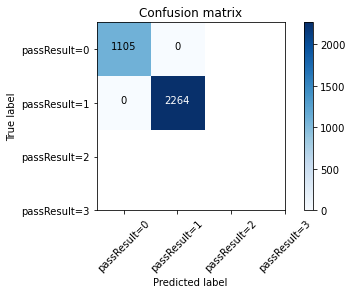

In [26]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['passResult=0','passResult=1', 'passResult=2', 'passResult=3'],normalize= False,  title='Confusion matrix')

In [27]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2265
           1       0.90      1.00      0.95      1107
           2       0.98      0.54      0.70       257
           3       1.00      1.00      1.00        88

    accuracy                           0.97      3717
   macro avg       0.97      0.89      0.91      3717
weighted avg       0.97      0.97      0.96      3717



In [28]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.17215952129507714

In [29]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.11


In [58]:
yhat1 = neigh.predict(X_test)
yhat1[0:5]

array([2, 0, 1, 1, 1])

Confusion matrix, without normalization
[[1091   16]
 [  14 2251]]


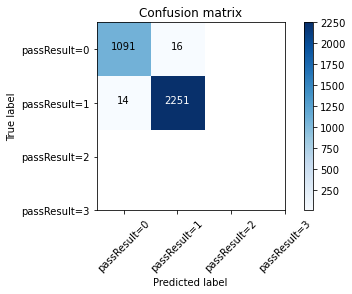

In [59]:
cnf_matrix = confusion_matrix(y_test, yhat1, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['passResult=0','passResult=1', 'passResult=2', 'passResult=3'],normalize= False,  title='Confusion matrix')

In [60]:
print (classification_report(y_test, yhat1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2265
           1       0.96      0.99      0.97      1107
           2       0.93      0.88      0.91       257
           3       1.00      0.81      0.89        88

    accuracy                           0.98      3717
   macro avg       0.97      0.92      0.94      3717
weighted avg       0.98      0.98      0.98      3717



In [61]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (14867, 13) (14867,)
Test set: (3717, 13) (3717,)


In [62]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [63]:
yhat2 = clf.predict(X_test)
yhat2 [0:5]

array([2, 0, 1, 1, 1])

Confusion matrix, without normalization
[[1107    0]
 [   0 2265]]


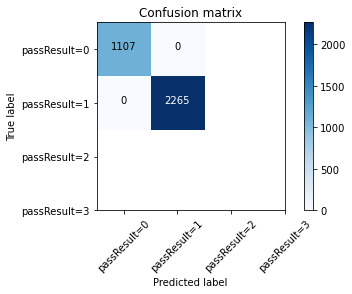

In [64]:
cnf_matrix = confusion_matrix(y_test, yhat4, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['passResult=0','passResult=1', 'passResult=2', 'passResult=3'],normalize= False,  title='Confusion matrix')